<a href="https://colab.research.google.com/github/mishad01/Deep-Learning-and-Machine-Learning/blob/main/Pattern%20Recognition/Lab_7_K_means_clustering_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Patter Recognition Lab Dataset /CarbonEmissionIndia.csv')
df.head()

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.17,27.18,16.97
1,Arunachal,405.90,17.43,25.82
2,Assam,340.91,16.63,21.29
3,Bihar,179.01,8.83,9.59
4,Chattisgarh,1963.88,17.56,22.37


In [58]:
df.isna().sum()

,0
States,0
per capita CO2 (kg per person),0
per capita CO (kg per person),0
per capita CH4 (kg per person),0


In [59]:
df = df.iloc[:, [2, 3]]


In [60]:
df

,per capita CO (kg per person),per capita CH4 (kg per person)
0,27.18,16.97
1,17.43,25.82
2,16.63,21.29
3,8.83,9.59
4,17.56,22.37
5,23.12,7.62
6,24.01,12.26
7,17.90,21.57
8,16.98,18.28
9,15.59,14.42


In [61]:
from sklearn.cluster import KMeans


In [62]:
wcss=[]
for i in range (1,15):
  kmean = KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmean.fit(df)
  wcss.append(kmean.inertia_)


Text(0.5, 1.0, 'The Elbow Method')

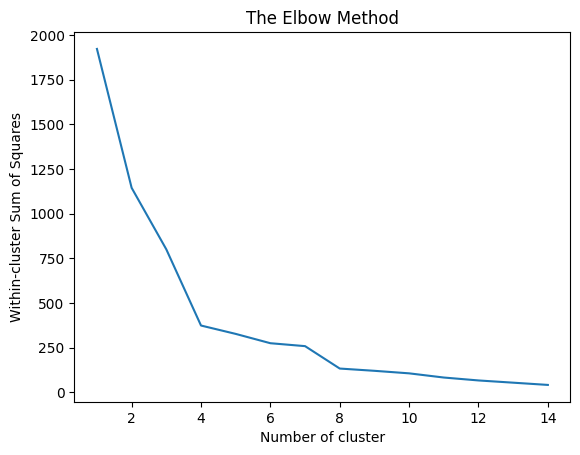

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),wcss)
plt.xlabel('Number of cluster')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('The Elbow Method')

In [64]:
kmean = KMeans(n_clusters=8,init = 'k-means++',random_state=0)
y_kmeans = kmean.fit_predict(df)

In [65]:
cluster_num= kmean.fit_predict(df)
df['cluster_num']=cluster_num


In [66]:
df.groupby(['cluster_num']).count()

,per capita CO (kg per person),per capita CH4 (kg per person)
cluster_num,,
0,2,2
1,4,4
2,2,2
3,2,2
4,7,7
5,5,5
6,5,5
7,1,1


In [67]:
x = df

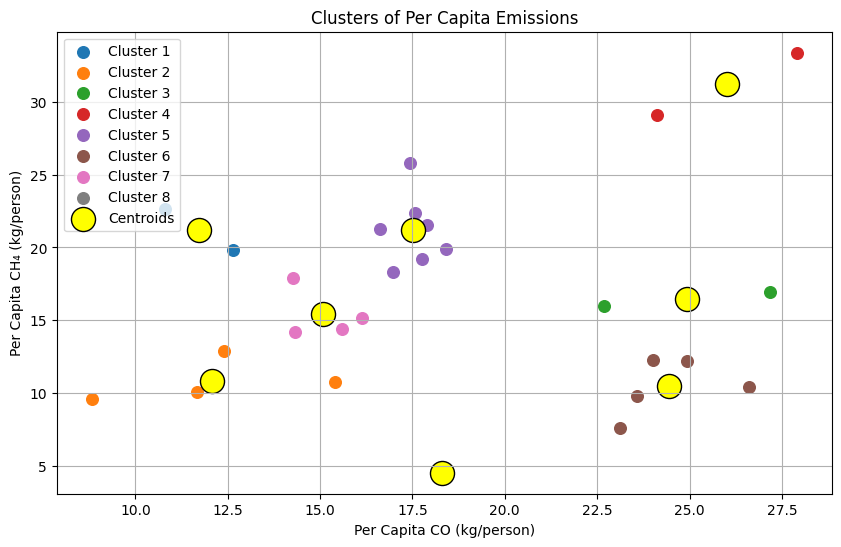

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
k = 8
for i in range(k):
  if isinstance(x, np.ndarray):
    plt.scatter(x[cluster_num == i, 0], x[cluster_num == i, 1], s= 70, label=f"Cluster {i+1}s=size of the points")
  else:
    plt.scatter(x.iloc[cluster_num == i, 0], x.iloc[cluster_num == i, 1], s=70, label=f"Cluster {i+1}")

# plotting the centroids
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s=300, c="yellow", edgecolor='black', label="Centroids")
plt.title("Clusters of Per Capita Emissions")
plt.xlabel("Per Capita CO (kg/person)")
plt.ylabel("Per Capita CH₄ (kg/person)")
plt.legend()
plt.grid(True)
plt.show()


In [69]:
df.head()

,per capita CO (kg per person),per capita CH4 (kg per person),cluster_num
0,27.18,16.97,2
1,17.43,25.82,4
2,16.63,21.29,4
3,8.83,9.59,1
4,17.56,22.37,4
